# Nicaviz Demo

_By Nicapotato_

In [1]:
%reload_ext autoreload
%autoreload 2
%load_ext watermark

In [2]:
import pandas as pd
import numpy as np
from numpy import random
import nicaviz
import seaborn as sns
import time

notebookstart = time.time()

sns.set_style("whitegrid")

%watermark 
%watermark --iversions

Last updated: 2021-09-28T10:42:06.496736+01:00

Python implementation: CPython
Python version       : 3.7.7
IPython version      : 7.13.0

Compiler    : Clang 4.0.1 (tags/RELEASE_401/final)
OS          : Darwin
Release     : 19.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 12
Architecture: 64bit

pandas : 1.2.3
nicaviz: 0.1.2
seaborn: 0.10.1
numpy  : 1.18.1



In [3]:
def random_dates(start, end, n=10):

    start_u = start.value//10**9
    end_u = end.value//10**9

    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')

DFLEN = 5000
df = pd.DataFrame({
    'int_small': random.randint(low=0, high=5, size=DFLEN),
    'int_med': random.randint(low=0, high=20, size=DFLEN),
    'str_med': random.choice(["a","b","c","d","e","f","g"], size=DFLEN),
    'str_med_two': random.choice([x for x in "qwerty"], size=DFLEN),
    'str_small': random.choice(["blue","red"], size=DFLEN),
    'bool': random.choice([True,False], size=DFLEN),
    'cont_rand': random.random(size=DFLEN)*10,
    'cont_uni': random.normal(loc=0, scale=1, size=DFLEN)*10,
    'date': pd.date_range(start='1/1/2018', periods=DFLEN),
    'timestamp': random_dates(pd.to_datetime('2018-01-01'), pd.to_datetime('2018-03-01'), n=DFLEN)
    })

display(df.sample(10))

,int_small,int_med,str_med,str_med_two,str_small,bool,cont_rand,cont_uni,date,timestamp
4685,1,13,d,q,blue,False,5.803317,6.154821,2030-10-30,2018-02-05 22:34:44
4063,3,10,b,t,red,True,9.258269,-1.194841,2029-02-15,2018-01-07 14:09:25
2386,1,2,c,r,blue,True,5.225756,7.901510,2024-07-14,2018-01-15 20:39:18
918,2,4,a,t,red,True,9.339469,6.748745,2020-07-07,2018-02-21 09:38:55
1162,4,9,f,r,red,True,5.968632,0.043728,2021-03-08,2018-01-14 17:31:37
797,0,6,a,q,blue,False,5.591503,5.631110,2020-03-08,2018-01-30 22:48:36
816,2,19,c,e,red,False,4.434493,-2.175477,2020-03-27,2018-02-02 11:51:53
570,2,11,d,q,red,False,5.396315,-6.450389,2019-07-25,2018-02-19 13:01:52
268,3,2,c,t,blue,False,0.893579,-7.502446,2018-09-26,2018-02-22 19:26:29
2245,1,4,c,w,blue,False,0.025812,-10.079648,2024-02-24,2018-01-25 06:22:34


In [4]:
df.head()

,int_small,int_med,str_med,str_med_two,str_small,bool,cont_rand,cont_uni,date,timestamp
0,4,8,e,e,blue,True,3.061058,-2.007222,2018-01-01,2018-02-14 07:01:05
1,4,10,a,e,red,True,6.545226,-21.244189,2018-01-02,2018-02-10 03:42:40
2,1,4,e,y,red,False,4.542653,19.782341,2018-01-03,2018-02-25 19:56:17
3,2,13,a,y,blue,True,4.543941,-10.491728,2018-01-04,2018-01-20 11:52:52
4,1,13,f,e,red,True,1.753627,-5.589722,2018-01-05,2018-01-09 02:46:44


In [5]:
df.nica.categorical_describe()

Dataframe Dimension: 5000 Rows, 10 Columns


,Unique,Missing,dtype,ValCount 1,Occ,ValCount 2,Occ,ValCount 3,Occ,ValCount 4,Occ,ValCount 5,Occ
Column,,,,,,,,,,,,,
int_small,5,0,int64,3,1024,1,1019,0,1005.0,4,978.0,2,974.0
int_med,20,0,int64,14,281,12,270,6,266.0,16,260.0,13,260.0
str_med,7,0,object,c,771,g,748,a,741.0,b,715.0,f,687.0
str_med_two,6,0,object,r,878,t,858,e,829.0,q,816.0,y,812.0
str_small,2,0,object,blue,2516,red,2484,NaN,NaN,NaN,NaN,NaN,NaN
bool,2,0,bool,True,2511,False,2489,NaN,NaN,NaN,NaN,NaN,NaN
cont_rand,5000,0,float64,3.743855,1,2.450288,1,7.710855,1.0,4.425705,1.0,5.919047,1.0
cont_uni,5000,0,float64,6.028582,1,6.36942,1,-13.481386,1.0,6.253285,1.0,-10.916892,1.0
date,5000,0,datetime64[ns],2026-04-30 00:00:00,1,2020-10-31 00:00:00,1,2021-09-28 00:00:00,1.0,2030-04-04 00:00:00,1.0,2025-12-02 00:00:00,1.0


In [6]:
with nicaviz.timer("Reduce Memory"):
    df, na_list = nicaviz.reduce_mem_usage(df)

DF Memory Before  :            0.35 MB
DF Memory After   :            0.24 MB
Reduced by        :           30.13 %

Numeric Columns with NAN replaced with -1:
[]
[Reduce Memory] done in 0.0 s


In [7]:
df.nica.categorical_describe()

Dataframe Dimension: 5000 Rows, 10 Columns


,Unique,Missing,dtype,ValCount 1,Occ,ValCount 2,Occ,ValCount 3,Occ,ValCount 4,Occ,ValCount 5,Occ
Column,,,,,,,,,,,,,
int_small,5,0,uint8,3,1024,1,1019,0,1005.0,4,978.0,2,974.0
int_med,20,0,uint8,14,281,12,270,6,266.0,16,260.0,13,260.0
str_med,7,0,object,c,771,g,748,a,741.0,b,715.0,f,687.0
str_med_two,6,0,object,r,878,t,858,e,829.0,q,816.0,y,812.0
str_small,2,0,object,blue,2516,red,2484,NaN,NaN,NaN,NaN,NaN,NaN
bool,2,0,bool,True,2511,False,2489,NaN,NaN,NaN,NaN,NaN,NaN
cont_rand,4999,0,float32,9.897974,2,2.551411,1,1.862314,1.0,9.631108,1.0,9.175133,1.0
cont_uni,5000,0,float32,-11.362979,1,-10.318564,1,-5.852949,1.0,5.74848,1.0,-7.145762,1.0
date,5000,0,datetime64[ns],2026-04-30 00:00:00,1,2020-10-31 00:00:00,1,2021-09-28 00:00:00,1.0,2030-04-04 00:00:00,1.0,2025-12-02 00:00:00,1.0


[Count Plot] done in 0.0 s


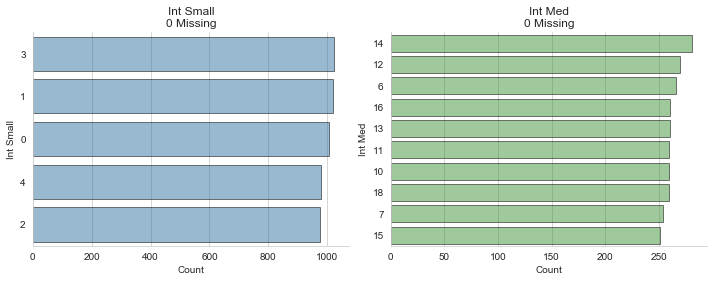

In [8]:
with nicaviz.timer("Count Plot"):
    df.nica.mass_plot(
        plt_set= ["int_small", "int_med"],
        plottype = "countplot")

[Bar Plot] done in 0.0 s


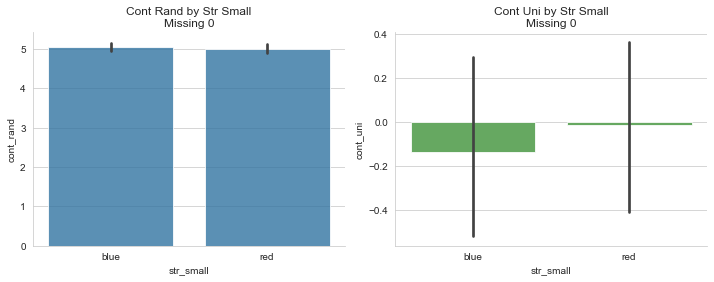

In [9]:
with nicaviz.timer("Bar Plot"):
    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        x_var = "str_small",
        plottype = "bar")

[Boxplots] done in 0.0 s


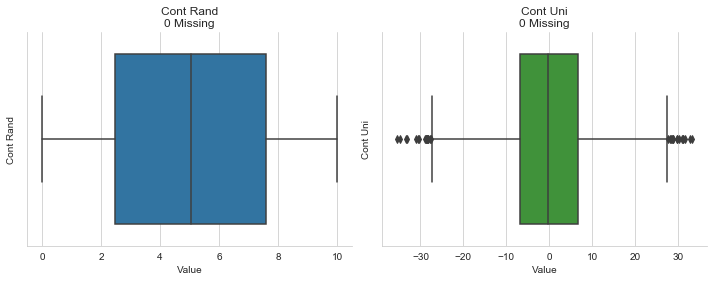

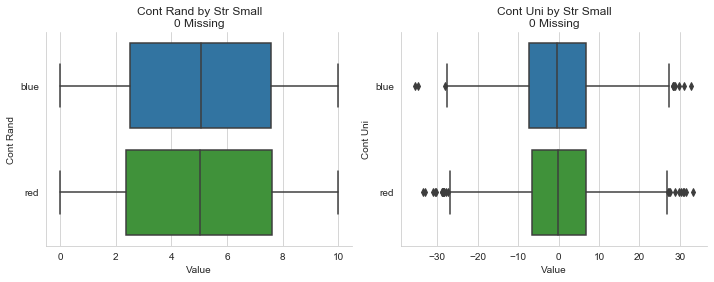

In [10]:
with nicaviz.timer("Boxplots"):
    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        plottype = "boxplot")

    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        hue = "str_small",
        plottype = "boxplot")

[Distplots] done in 0.0 s


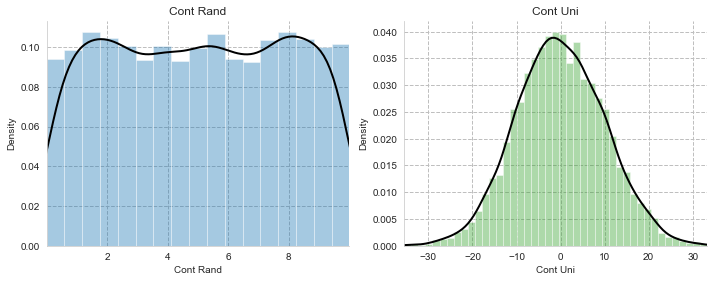

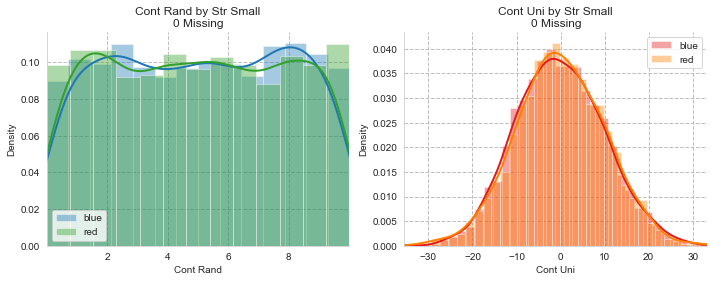

In [11]:
with nicaviz.timer("Distplots"):
    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        plottype = "distplot")

    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        hue = "str_small",
        plottype = "distplot")

[Distplots] done in 0.0 s


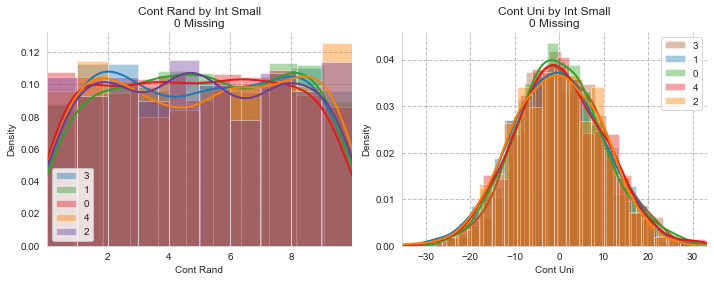

In [12]:
with nicaviz.timer("Distplots"):
    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        hue = "int_small",
        plottype = "distplot")

[Countplot] done in 0.0 s


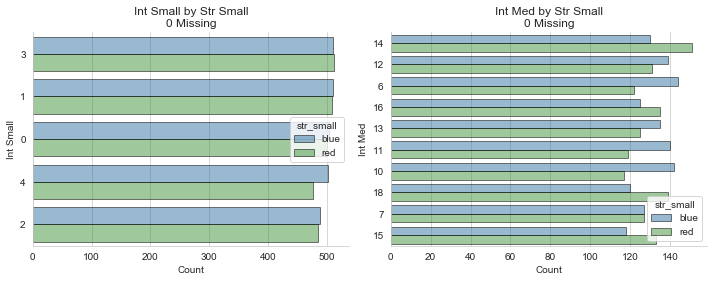

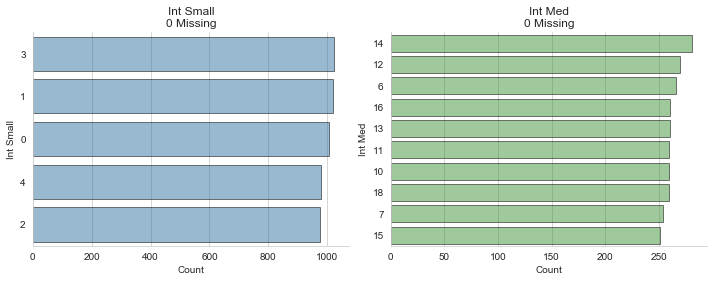

In [13]:
with nicaviz.timer("Countplot"):
    df.nica.mass_plot(
        plt_set= ["int_small", "int_med"],
        hue = "str_small",
        plottype = "countplot")

    df.nica.mass_plot(
        plt_set= ["int_small", "int_med"],
        plottype = "countplot")

### Time Series

[Timeserie Resample Plot] done in 0.0 s


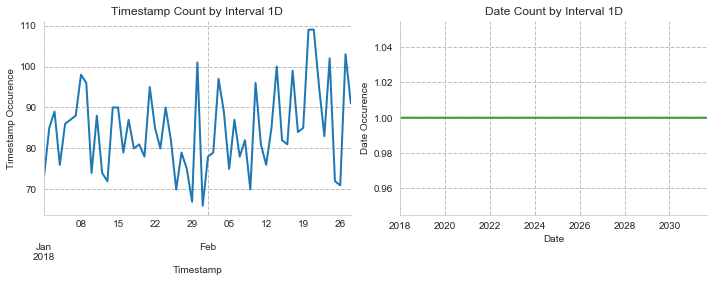

In [14]:
with nicaviz.timer("Timeserie Resample Plot"):
    df.nica.mass_plot(
        plt_set= ["timestamp", "date"],
        plottype = "ts_resample",
        resample=True,
        resample_interval="1D"
    )

[Timeserie Resample Plot] done in 0.0 s


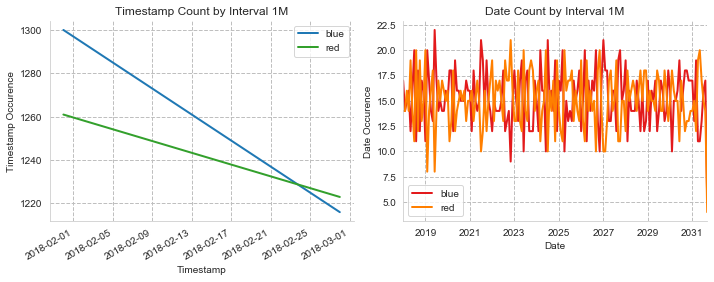

In [15]:
with nicaviz.timer("Timeserie Resample Plot"):
    df.nica.mass_plot(
        plt_set= ["timestamp", "date"],
        plottype = "ts_resample",
        resample=True,
        hue = "str_small",
        resample_interval="1M"
    )

[Timeserie Rolling Plot] done in 0.0 s


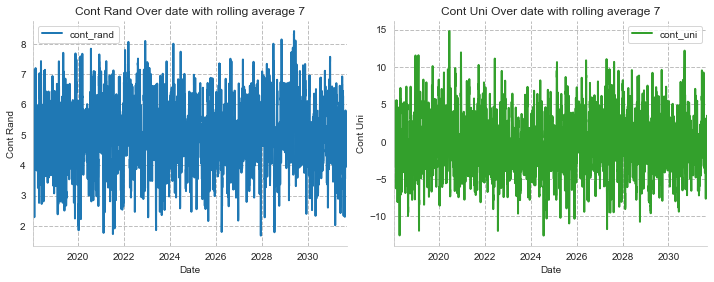

In [16]:
with nicaviz.timer("Timeserie Rolling Plot"):
    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        plottype = "ts_rolling",
        x_var="date",
        rolling=True,
        r=7
    )

[Timeserie Rolling Plot] done in 0.0 s


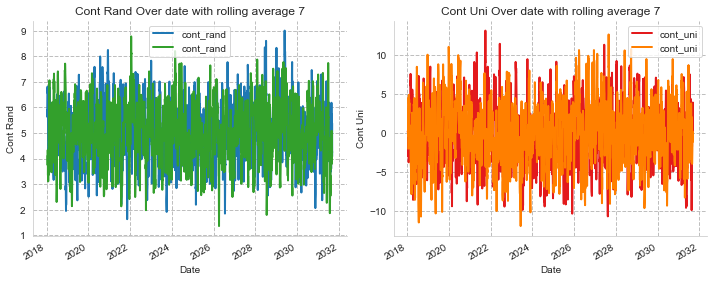

In [17]:
with nicaviz.timer("Timeserie Rolling Plot"):
    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        plottype = "ts_rolling",
        hue = "str_small",
        x_var="date",
        rolling=True,
        r=7
    )

### WordClouds

[Wordcloud Plot] done in 1.0 s


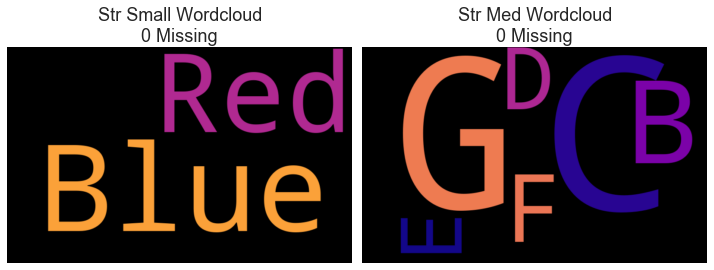

In [18]:
with nicaviz.timer("Wordcloud Plot"):
    df.nica.mass_plot(
        plt_set= ["str_small", "str_med"],
        plottype = "wordcloud")

### Rank Correlations

[Correlation Plot] done in 4.0 s


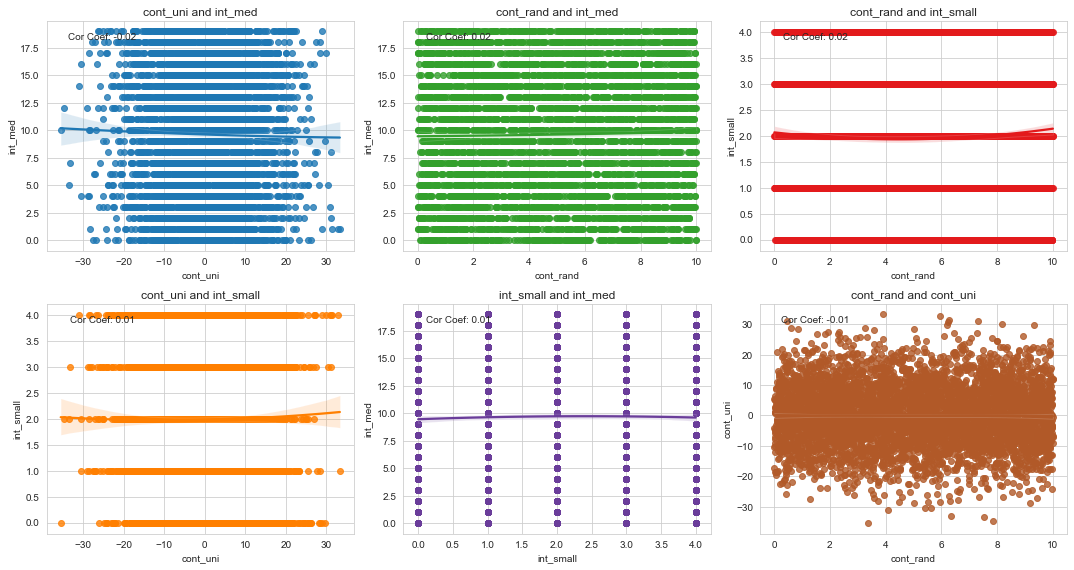

In [19]:
with nicaviz.timer("Correlation Plot"):
    df.nica.rank_correlations_plots(["cont_rand", "cont_uni", "int_small", "int_med"], 9)

### Pivot Heatmaps

[Pivot Heatmap Plot] done in 9.0 s


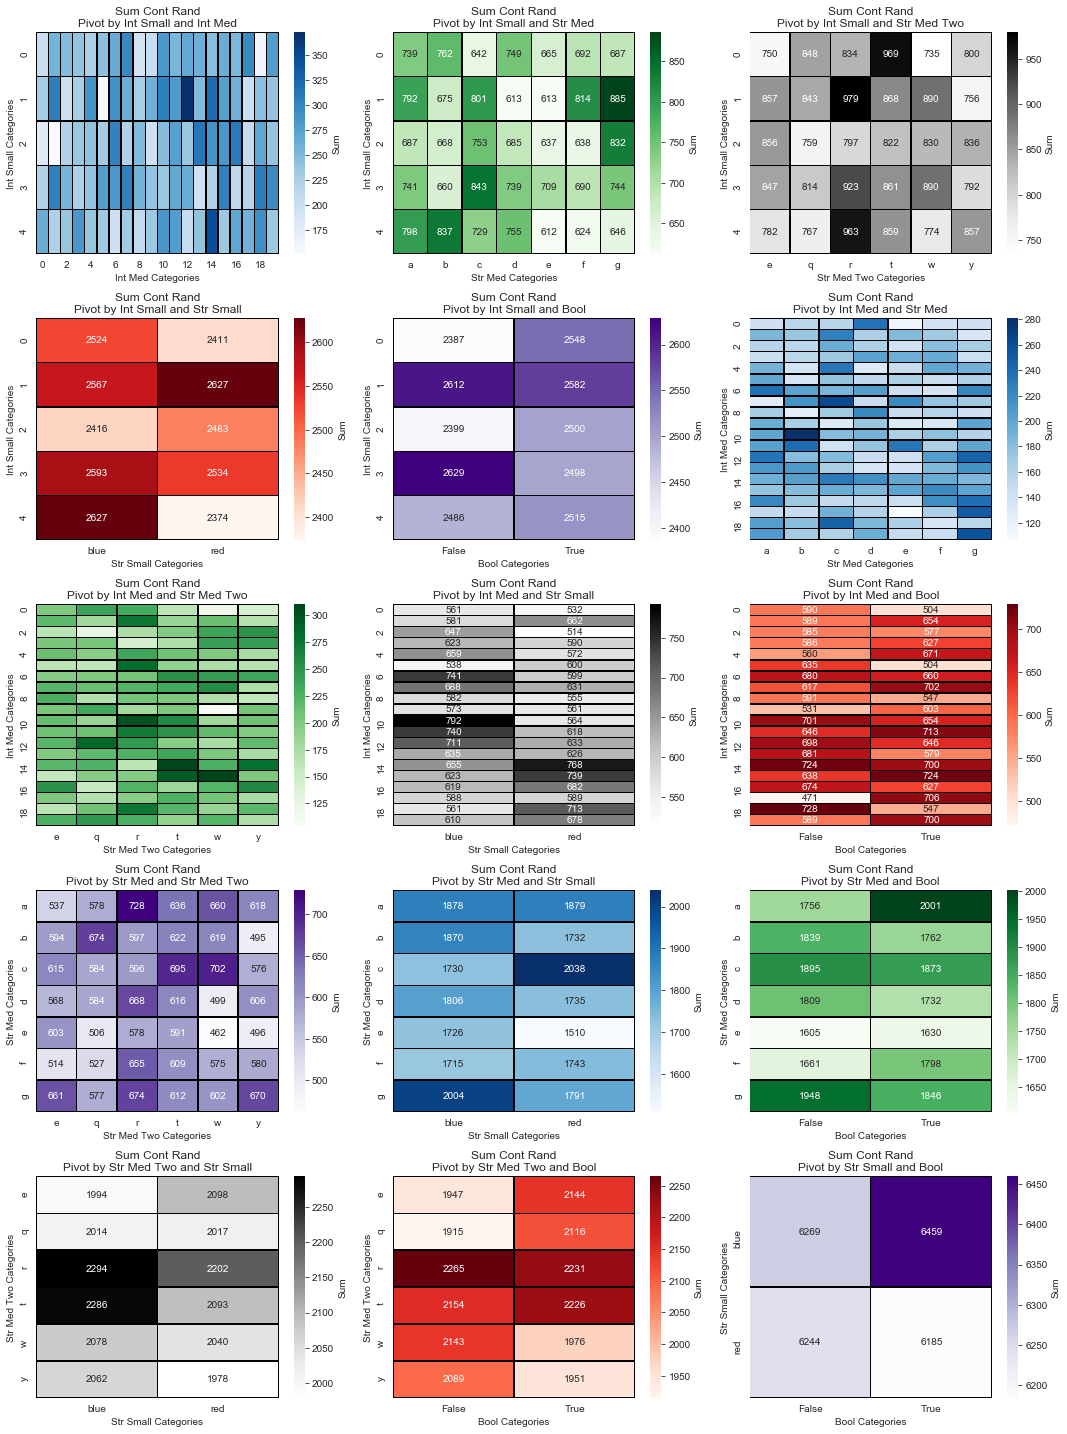

In [20]:
with nicaviz.timer("Pivot Heatmap Plot"):
    categorical = ['int_small', 'int_med', 'str_med', 'str_med_two', 'str_small', 'bool']
    df.nica.pivot_plots(categorical, "cont_rand", np.sum)

[Pivot Heatmap Plot] done in 9.0 s


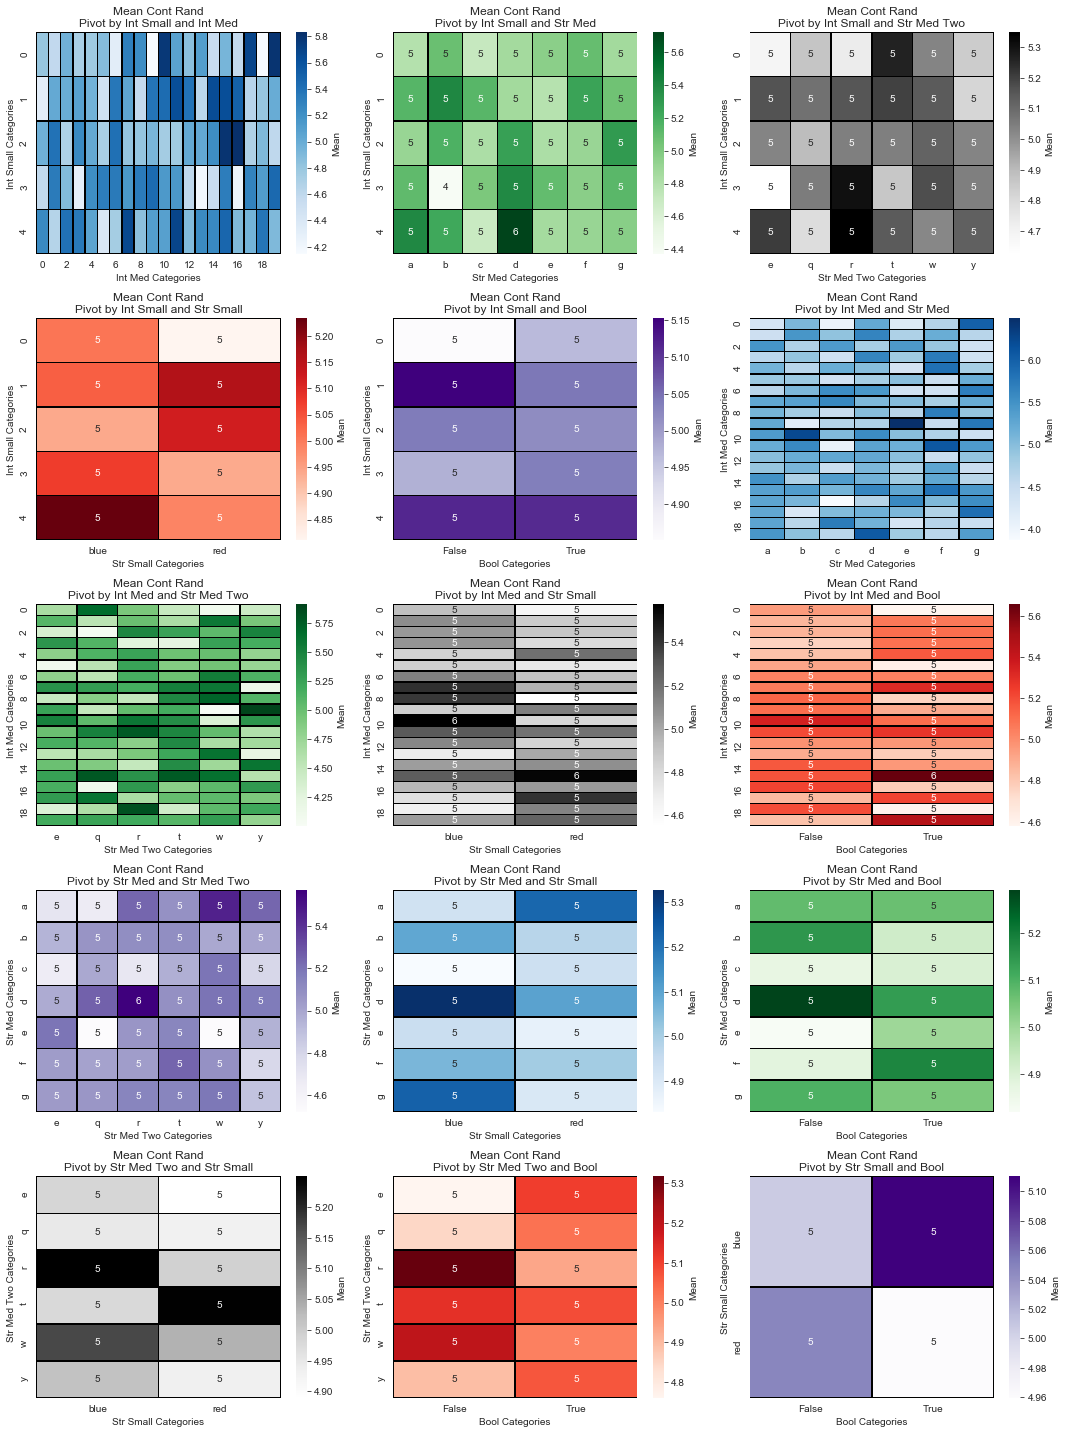

In [21]:
with nicaviz.timer("Pivot Heatmap Plot"):
    df.nica.pivot_plots(categorical, "cont_rand", np.mean)

In [22]:
print("Notebook Runtime: %0.2f Minutes"%((time.time() - notebookstart)/60))

Notebook Runtime: 0.61 Minutes
